In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qw.walksystem import WalkSystem
from qw.analysis import fitting, validity, inrprod, transform_counts_list

In [2]:
steps = 1500
dt = 0.01
t = np.linspace(dt, steps*dt, steps)

order_dict = {2:0, 3:1, 4:2}
length_dict = {3:0, 4:1, 7:2, 8:3, 15:4, 16:5}
layer_dict = {1:0, 2:1, 3:2, 4:3, 5:4, 10:5}

In [3]:
folder = 'ex'
sys = 'ex'
network = 'tri'
lengths = [3,4,7,8,15,16]
ws = WalkSystem(folder, sys, network)
tri = ws.read_all_msd(length=lengths)

In [4]:
folder = 'ex'
sys = 'ex'
network = 'sg'
orders = [2,3,4]
ws = WalkSystem(folder, sys, network)
sg = ws.read_all_msd(order=orders)

In [5]:
folder = 'ex'
sys = 'ex'
network = 'dsg'
orders = [2,3,4]
ws = WalkSystem(folder, sys, network)
dsg = ws.read_all_msd(order=orders)

In [6]:
folder = 'sim'
sys = 'qasm'
network = 'dsg'
layers = [1,2,3,4,5,10]
ws = WalkSystem(folder, sys, network)
qasm = ws.read_all_msd(layers=layers)

In [7]:
folder = 'sim'
sys = 'qasm'
network = 'dsg'
encoding = 'bin'
layers = [1,2,3,4,5,10]
ws = WalkSystem(folder, sys, network, encoding=encoding)
qasm_log = ws.read_all_msd(layers=layers)

In [8]:
folder = 'qpu'
sys = 'hanoi'
network = 'dsg'
layers = [1,2]
ws = WalkSystem(folder, sys, network)
qpu = ws.read_all_msd(layers=layers)

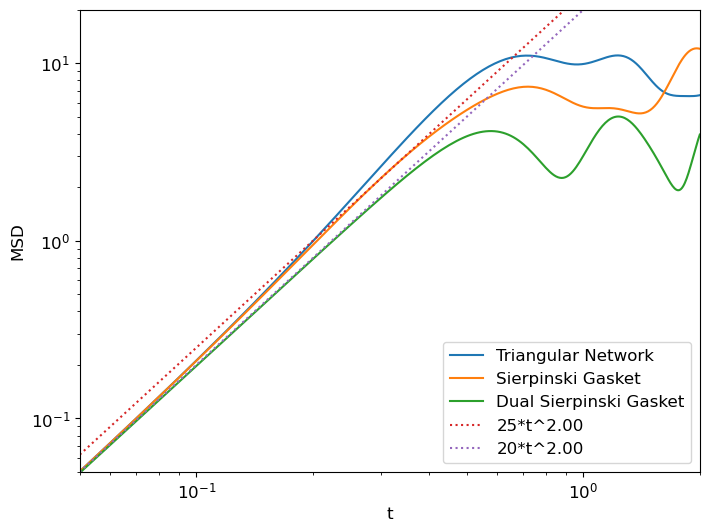

In [9]:
si = 4
sf = 200

plt.rc('font', size=12)
fig = plt.figure(figsize=(8, 6))
linewidth = 1.5
linestyle = '-'
selected_orders = [2]
selected_lengths = [4]
selected_layers = [10]

# for ly in selected_layers:
#     i = layer_dict[ly]
#     plt.plot(t[si:sf], qasm[i, si:sf], linewidth=linewidth, linestyle=linestyle, label=f'qasm-un-{ly}-layer')

# for ly in selected_layers:
#     i = layer_dict[ly]
#     plt.plot(t[si:sf], qpu[i, si:sf], linewidth=linewidth, linestyle=linestyle, label=f'Hanoi-{ly}-layer')

for length in selected_lengths:
    i = length_dict[length]
    plt.plot(t[si:sf], tri[i,si:sf], linewidth=linewidth, linestyle=linestyle, label=f'Triangular Network')

for order in selected_orders:
    i = order_dict[order]
    plt.plot(t[si:sf], sg[i,si:sf], linewidth=linewidth, linestyle=linestyle, label=f'Sierpinski Gasket')

for order in selected_orders:
    i = order_dict[order]
    plt.plot(t[si:sf], dsg[i,si:sf], linewidth=linewidth, linestyle=linestyle, label=f'Dual Sierpinski Gasket')

# for ly in selected_layers:
#     i = layer_dict[ly]
#     plt.plot(t[si:sf], qasm_log[i, si:sf], linewidth=linewidth, linestyle=linestyle, label=f'QASM-{ly}-layer')

consts = [25, 20]
powers = [2, 2]
fitting(t, consts, powers, si, sf, linewidth=linewidth, linestyle=':')

plt.legend(loc='lower right')
plt.xlabel("t")
plt.ylabel("MSD")
plt.xscale("log")
plt.yscale("log")

plt.xlim([0.05, 2])
plt.ylim([0.05, 20])
# plt.savefig(f'images/comp_fractal_o2_{sf*dt:.1f}s_msd_plot_log.svg', format='svg')

plt.show()

In [9]:
folder = 'ex'
ws = WalkSystem(folder, name='exact_dsg_rw_ex_o4_15.0s_1500vly')
data1 = ws.read_msd_list()
ws = WalkSystem(folder, name='exact_dsg_qw_ex_o4_15.0s_1500vly')
data2 = ws.read_msd_list()

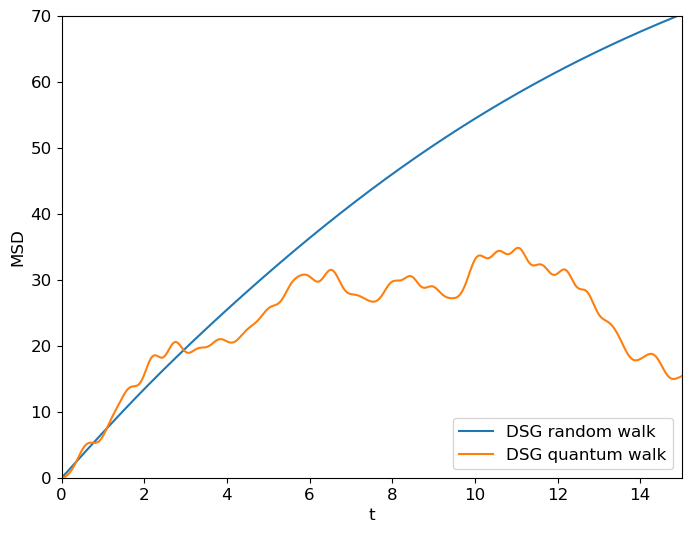

In [10]:
si = 0
sf = 1500

plt.rc('font', size=12)
fig = plt.figure(figsize=(8, 6))
linewidth = 1.5
linestyle = '-'

plt.plot(t[si:sf], data1[si:sf], linewidth=linewidth, linestyle=linestyle, label='DSG random walk')
plt.plot(t[si:sf], data2[si:sf], linewidth=linewidth, linestyle=linestyle, label='DSG quantum walk')

plt.legend(loc='lower right')
plt.xlabel("t")
plt.ylabel("MSD")
# plt.xscale("log")
# plt.yscale("log")

plt.xlim([0, 15])
plt.ylim([0, 70])
# plt.savefig(f'images/comp_rw-qw_dsg_o4_{sf*dt:.1f}s_msd_plot.svg', format='svg')

plt.show()

In [11]:
folder = 'sim'
ws = WalkSystem(folder, name='ibmq_qasm_simulator_dsg_3tqw_un_o2_3.0s_10ly')
data1 = ws.read_msd_list()
ws = WalkSystem(folder, name='ibmq_qasm_simulator_dsg_3tqw_un_o2_XY_3.0s_10ly')
data2 = ws.read_msd_list()
ws = WalkSystem(folder, name='ibmq_qasm_simulator_dsg_3tqw_bin_o2_3.0s_10ly')
data3 = ws.read_msd_list()
ws = WalkSystem(folder, name='ibmq_qasm_simulator_dsg_3tqw_bin_o2_rx_3.0s_10ly')
data4 = ws.read_msd_list()
folder = 'ex'
ws = WalkSystem(folder, name='exact_dsg_qw_ex_o2_15.0s_1500vly')
data5 = ws.read_msd_list()

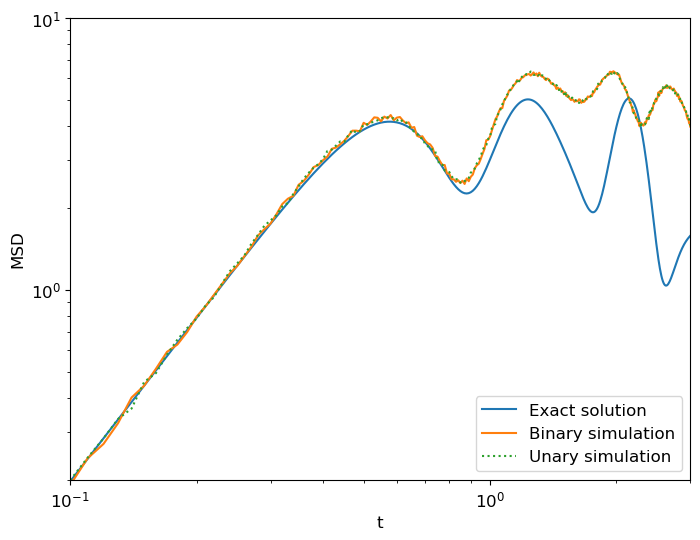

In [12]:
si = 9
sf = 300

plt.rc('font', size=12)
fig = plt.figure(figsize=(8, 6))
linewidth = 1.5
linestyle = '-'

plt.plot(t[si:sf], data5[si:sf], linewidth=linewidth, linestyle=linestyle, label='Exact solution')
# plt.plot(t[si:sf], data2[si:sf], linewidth=linewidth, linestyle=linestyle, label='Unary XY model')
plt.plot(t[si:sf], data3[si:sf], linewidth=linewidth, linestyle=linestyle, label='Binary simulation')
# plt.plot(t[si:sf], data4[si:sf], linewidth=linewidth, linestyle=':', label='Binary RX operation')
plt.plot(t[si:sf], data1[si:sf], linewidth=linewidth, linestyle=':', label='Unary simulation')

plt.legend(loc='lower right')
plt.xlabel("t")
plt.ylabel("MSD")
plt.xscale("log")
plt.yscale("log")

plt.xlim([0.1, 3])
plt.ylim([0.2, 10])
# plt.savefig(f'images/comp_un-bin_dsg_o2_{sf*dt:.1f}s_msd_plot.svg', format='svg')

plt.show()

In [13]:
order = 2
length = 2**order-1

In [14]:
folder = 'ex'
network = 'dsg'
ws = WalkSystem(folder, network=network, order=order)
exact = ws.read_msd_list()

In [15]:
folder = 'ex'
network = 'tri'
ws = WalkSystem(folder, network=network, length=length)
tri = ws.read_msd_list()

In [16]:
folder = 'sim'
sys = 'qasm'
network = 'dsg'
layers = [1,2,3,4,5,10]
ws = WalkSystem(folder, sys=sys, network=network, order=order)
qasm = ws.read_all_msd(layers=layers)

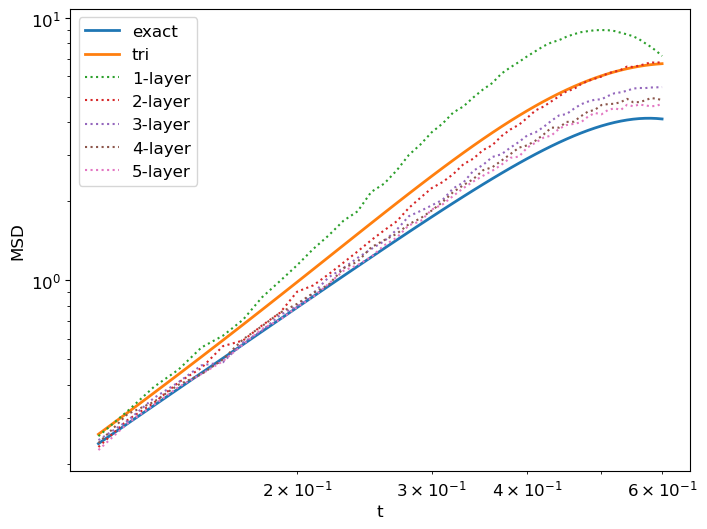

In [17]:
si = 10
sf = 60

fig = plt.figure(figsize=(8, 6))
linewidth = 2
linestyle = '-'
selected_layers = [1,2,3,4,5]

plt.plot(t[si:sf], exact[si:sf], linewidth=linewidth, linestyle=linestyle, label='exact')
plt.plot(t[si:sf], tri[si:sf], linewidth=linewidth, linestyle=linestyle, label='tri')
for ly in selected_layers:
    i = layer_dict[ly]
    plt.plot(t[si:sf], qasm[i, si:sf], linewidth=1.5, linestyle=':', label=f'{ly}-layer')

plt.legend()
plt.xlabel("t")
plt.ylabel("MSD")
plt.xscale("log")
plt.yscale("log")
plt.show()

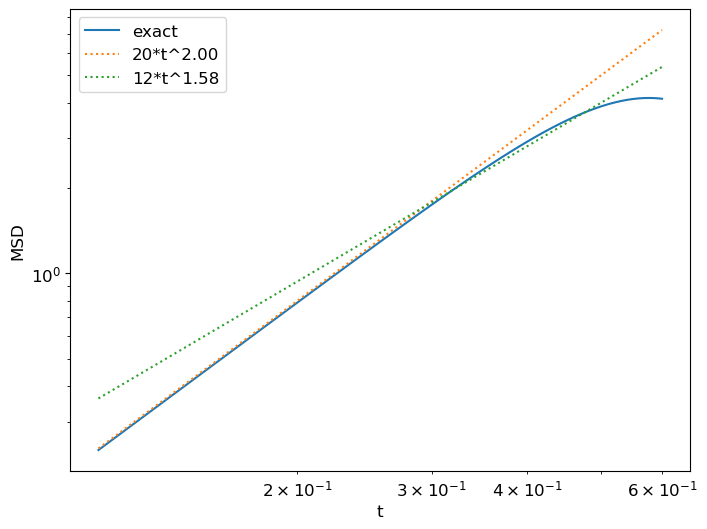

In [18]:
si = 10
sf = 60

fig = plt.figure(figsize=(8, 6))
linewidth = 1.5
linestyle = '-'

plt.plot(t[si:sf], exact[si:sf], linewidth=linewidth, linestyle=linestyle, label='exact')

consts = [20, 12]
powers = [2, np.log2(3)]
fitting(t, consts, powers, si, sf, linewidth=linewidth, linestyle=':')

plt.legend()
plt.xlabel("t")
plt.ylabel("MSD")
plt.xscale("log")
plt.yscale("log")
plt.show()

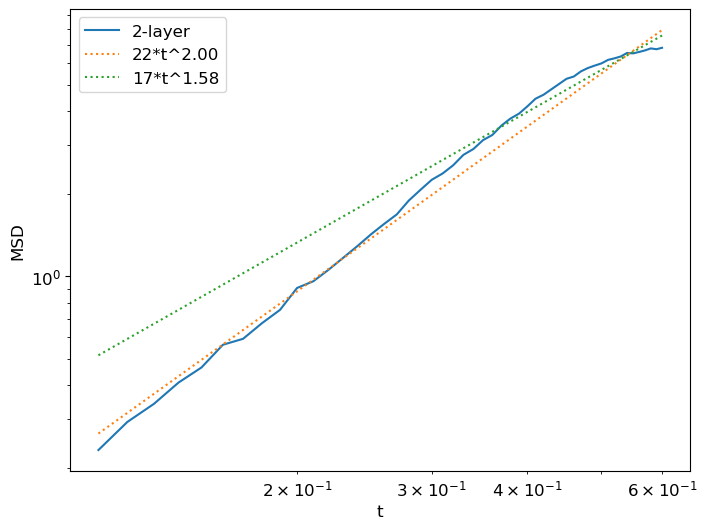

In [19]:
si = 10
sf = 60

fig = plt.figure(figsize=(8, 6))
linewidth = 1.5
linestyle = '-'

plt.plot(t[si:sf], qasm[1,si:sf], linewidth=linewidth, linestyle=linestyle, label=f'{2}-layer')

consts = [22, 17]
powers = [2, np.log2(3)]
fitting(t, consts, powers, si, sf, linewidth=linewidth, linestyle=':')

plt.legend()
plt.xlabel("t")
plt.ylabel("MSD")
plt.xscale("log")
plt.yscale("log")
plt.show()

In [9]:
order = 2

In [10]:
folder = 'ex'
network = 'tri'
length = 2**order-1
ws = WalkSystem(folder, network=network, length=length)
tri = ws.read_msd_list()

In [11]:
folder = 'ex'
network = 'dsg'
ws = WalkSystem(folder, network=network, order=order)
dsg = ws.read_msd_list()

In [12]:
folder = 'sim'
network = 'dsg'
sys = 'qasm'
layers = [1,2,3,4,5,10]
ws = WalkSystem(folder, sys=sys, network=network, order=order)
qasm = ws.read_all_msd(layers=layers)

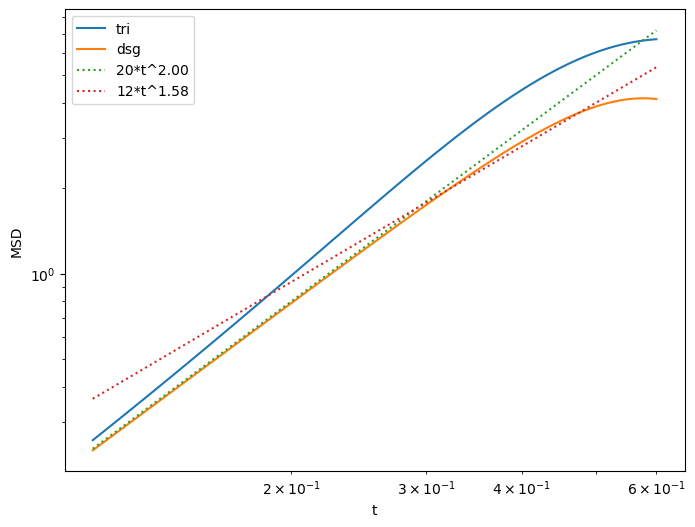

In [13]:
si = 10
sf = 60

fig = plt.figure(figsize=(8, 6))
linewidth = 1.5
linestyle = '-'
selected_layers = [1,2,3,4,5]

plt.plot(t[si:sf], tri[si:sf], linewidth=linewidth, linestyle=linestyle, label='tri')
plt.plot(t[si:sf], dsg[si:sf], linewidth=linewidth, linestyle=linestyle, label='dsg')
# for ly in selected_layers:
#     i = layer_dict[ly]
#     plt.plot(t[si:sf], qasm[i, si:sf], linewidth=linewidth, linestyle=linestyle, label=f'{ly}-layer')

consts = [20, 12]
powers = [2, 1.585]
fitting(t, consts, powers, si, sf, linewidth=linewidth, linestyle=':')

plt.legend()
plt.xlabel("t")
plt.ylabel("MSD")
plt.xscale("log")
plt.yscale("log")
plt.show()

In [14]:
folder = 'ex'

In [15]:
network = 'tri'
lengths = [3,4,7,8,15,16]
ws = WalkSystem(folder, network=network)
tri = ws.read_all_msd(length=lengths)

In [16]:
network = 'sg'
orders = [2,3,4]
ws = WalkSystem(folder, network=network)
sg = ws.read_all_msd(order=orders)

In [17]:
network = 'dsg'
orders = [2,3,4]
ws = WalkSystem(folder, network=network)
dsg = ws.read_all_msd(order=orders)

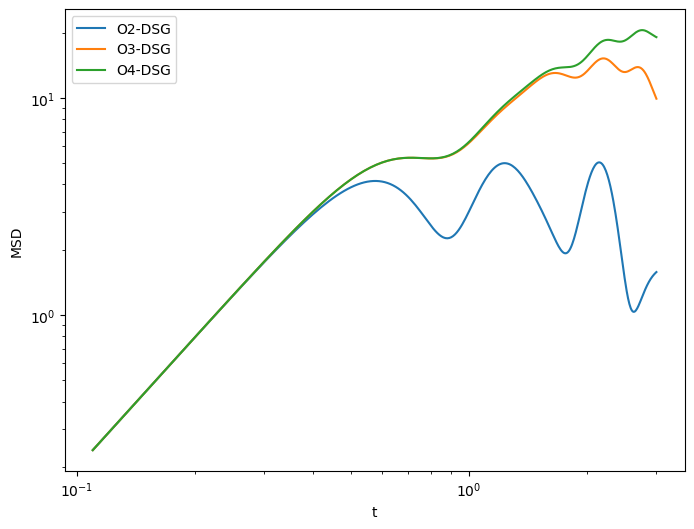

In [18]:
si = 10
sf = 300

fig = plt.figure(figsize=(8, 6))
linewidth = 1.5
linestyle = '-'
selected_orders = [2,3,4]

# for order in selected_orders:
#     length = 2**order
#     i = order_dict[order]
#     j = length_dict[length]
#     plt.plot(t[si:sf], tri[j, si:sf], linewidth=linewidth, linestyle=linestyle, label=f'L{length}-Tri')
#     plt.plot(t[si:sf], sg[i, si:sf], linewidth=linewidth, linestyle=linestyle, label=f'O{order}-SG')

for order in selected_orders:
    length = 2**order-1
    i = order_dict[order]
    j = length_dict[length]
#     plt.plot(t[si:sf], tri[j, si:sf], linewidth=linewidth, linestyle=linestyle, label=f'L{length}-Tri')
    plt.plot(t[si:sf], dsg[i, si:sf], linewidth=linewidth, linestyle=linestyle, label=f'O{order}-DSG')

# const_list = [50, 16]
# power_list = [2.4, 1.585]
# fitting(t, const_list, power_list, si, sf, linewidth=linewidth, linestyle=':')

plt.legend()
plt.xlabel("t")
plt.ylabel("MSD")
plt.xscale("log")
plt.yscale("log")
plt.show()

In [19]:
layers = 2
shots = 4000

folder = 'sim'
sys = 'qasm'
network = 'dsg'
ws = WalkSystem(folder, sys=sys, network=network, layers=layers)
sim_counts_list = ws.read_counts_list()

folder = 'qpu'
network = 'dsg'
ws = WalkSystem(folder, network=network, layers=layers)
sys_list = ['montreal','mumbai','auckland','hanoi']
qpu_counts_list = ws.read_all_counts(sys=sys_list)

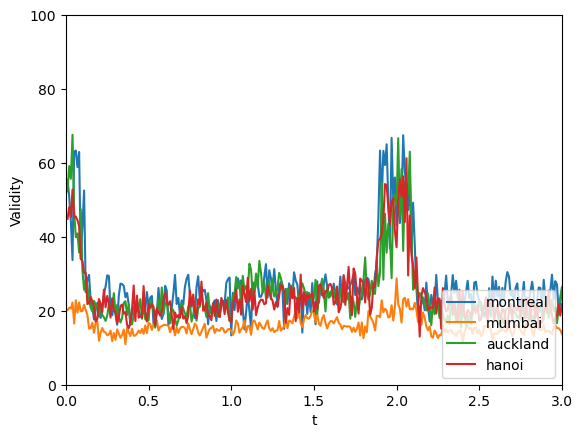

In [20]:
si = 0
sf = 300

for i, sys in enumerate(sys_list):
    valid_percentage = validity(qpu_counts_list[i], steps=ws._steps)*100/shots
    plt.plot(t[si:sf], valid_percentage[si:sf], label=f'{sys}')

plt.legend(loc='lower right')
plt.xlim([si*dt,sf*dt])
plt.ylim([0, 100])
plt.xlabel("t")
plt.ylabel("Validity")
plt.show()

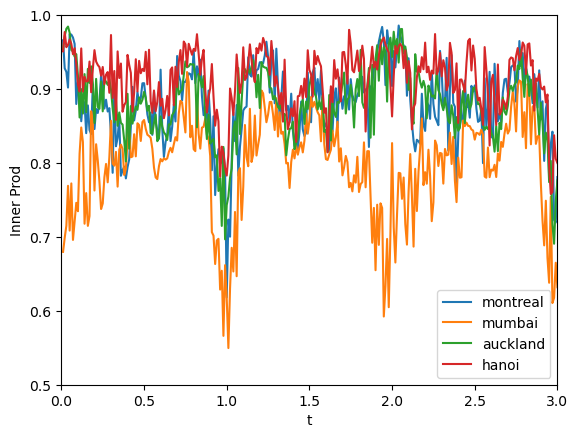

In [21]:
si = 0
sf = 300

for i, sys in enumerate(sys_list):
    inrprod_list = inrprod(qpu_counts_list[i], sim_counts_list, steps=ws._steps, shots=shots)
    plt.plot(t[si:sf], inrprod_list[si:sf], label=f'{sys}')

plt.legend(loc='lower right')
plt.xlim([si*dt,sf*dt])
plt.ylim([0.5, 1])
plt.xlabel("t")
plt.ylabel("Inner Prod")
plt.show()

In [22]:
order = 2

In [23]:
folder = 'ex'
sys = 'ex'
network = 'dsg'
ws = WalkSystem(folder, sys, network, order=order)
dsg = ws.read_msd_list()

In [24]:
folder = 'sim'
sys = 'qasm'
network = 'dsg'
layers = [1,2,3,4,5,10]
ws = WalkSystem(folder, sys, network, order=order)
qasm = ws.read_all_msd(layers=layers)

In [25]:
folder = 'qpu'
sys = 'hanoi'
network = 'dsg'
layers = [1,2]
ws = WalkSystem(folder, sys, network, order=order)
qpu = ws.read_all_msd(layers=layers)

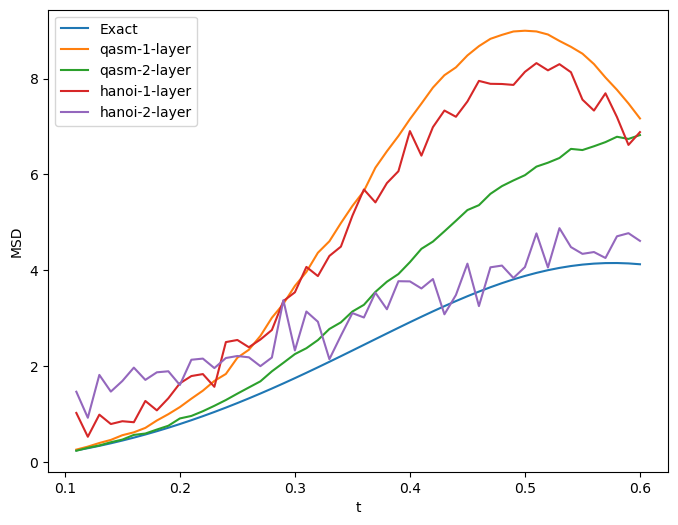

In [26]:
si = 10
sf = 60

fig = plt.figure(figsize=(8, 6))
linewidth = 1.5
linestyle = '-'
selected_layers = [1, 2]

plt.plot(t[si:sf], dsg[si:sf], linewidth=linewidth, linestyle=linestyle, label='Exact')
for ly in selected_layers:
    i = layer_dict[ly]
    plt.plot(t[si:sf], qasm[i,si:sf], linewidth=linewidth, linestyle=linestyle, label=f'qasm-{ly}-layer')
for ly in selected_layers:
    i = layer_dict[ly]
    plt.plot(t[si:sf], qpu[i,si:sf], linewidth=linewidth, linestyle=linestyle, label=f'{sys}-{ly}-layer')

plt.legend()
plt.xlabel("t")
plt.ylabel("MSD")
# plt.xscale("log")
# plt.yscale("log")
plt.show()